In [1]:
import torch
import torch.nn as nn
from models import GridMLMMelHarm
from GridMLM_tokenizers import CSGridMLMTokenizer
from data_utils import CSGridMLMDataset, CSGridMLM_collate_fn
from torch.utils.data import DataLoader
from train_utils import apply_masking
from generate_utils import generate_files_with_base2, generate_files_with_base2, load_model

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
val_dir = '/media/maindisk/maximos/data/hooktheory_all12_test'
# val_dir = '/media/maindisk/maximos/data/gjt_melodies/Library_melodies/'
tokenizer = CSGridMLMTokenizer(fixed_length=256)
# val_dataset = CSGridMLMDataset(val_dir, tokenizer, 512)

In [3]:
# curriculum_type = 'random'
curriculum_type = 'base2'
subfolder = 'all12'
device_name = 'cuda:2'
model = load_model(
    curriculum_type=curriculum_type,
    subfolder=subfolder,
    device_name='cuda:2',
    tokenizer=tokenizer,
    pianoroll_dim=100
)

In [4]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(count_parameters(model))

26203106


In [5]:
import os
data_files = []
for dirpath, _, filenames in os.walk(val_dir):
    for file in filenames:
        if file.endswith('.xml') or file.endswith('.mxl') or file.endswith('.musicxml'):
            full_path = os.path.join(dirpath, file)
            data_files.append(full_path)
print(len(data_files))

10486


In [6]:
val_idx = 0

# input_f = data_files[val_idx]
input_f = 'example_inputs/test_midi_constraints.mid'

mxl_folder = 'examples_musicXML/' + subfolder + '/' + curriculum_type + '/' + '/'
midi_folder = 'examples_MIDI/' + subfolder + '/' + curriculum_type + '/' + '/'
os.makedirs(mxl_folder, exist_ok=True)
os.makedirs(midi_folder, exist_ok=True)

gen_harm, real_harm, gen_score, real_score = generate_files_with_base2(
    model=model,
    tokenizer=tokenizer,
    input_f=input_f,
    mxl_folder=mxl_folder,
    midi_folder=midi_folder,
    name_suffix='constr_test',
    use_constraints=True
)

/home/maximos/miniconda3/envs/torch/lib/python3.12/site-packages/music21/base.py:559: UserWarning: Setting an ID that could be mistaken for a memory location is discouraged: got 128349194230320
  warnings.warn(msg)
libpng warning: iCCP: known incorrect sRGB profile
Error at line 30 col 47: no instrument found for part 'Pec080fa98907de14bd01ddb8bf568db5'
Error at line 637 col 47: no instrument found for part 'P09b535b6d153c68bc0a1de4b3a61d88a'
convert <examples_musicXML/all12/base2//gen_constr_test.mxl>...
	to <examples_MIDI/all12/base2//gen_constr_test.mid>
... success!
libpng warning: iCCP: known incorrect sRGB profile
Error at line 30 col 47: no instrument found for part 'P940d7d1a68378800226c5ea509f4b09a'
Error at line 637 col 47: no instrument found for part 'P773ecaba1be9e91387272b6db2a30e8f'
convert <examples_musicXML/all12/base2//real_constr_test.mxl>...
	to <examples_MIDI/all12/base2//real_constr_test.mid>
... success!


In [7]:
print(gen_harm)
print(tokenizer.ids_to_tokens[6])

['C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'D:maj', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'E:min', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'G:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 'C:maj', 

In [8]:
real_score.show('t')

{0.0} <music21.metadata.Metadata object at 0x74bbacee5430>
{0.0} <music21.stream.Part 0x74bbacf08080>
    {0.0} <music21.stream.Measure 1 offset=0.0>
        {0.0} <music21.clef.BassClef>
        {0.0} <music21.tempo.MetronomeMark allegro moderato Quarter=128>
        {0.0} <music21.key.Key of G major>
        {0.0} <music21.meter.TimeSignature 4/4>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Rest eighth>
        {0.75} <music21.note.Note G>
        {1.25} <music21.note.Rest 16th>
        {1.5} <music21.note.Note G>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note G>
        {3.0} <music21.note.Note A>
        {3.5} <music21.note.Note G>
    {4.0} <music21.stream.Measure 2 offset=4.0>
        {0.0} <music21.note.Note G>
        {0.25} <music21.note.Rest eighth>
        {0.75} <music21.note.Note G>
        {1.25} <music21.note.Rest 16th>
        {1.5} <music21.note.Note G>
        {2.0} <music21.note.Note B>
        {2.5} <music21.note.Note D>
  

In [9]:
m = real_score.parts[0].getElementsByClass('Measure')[6]

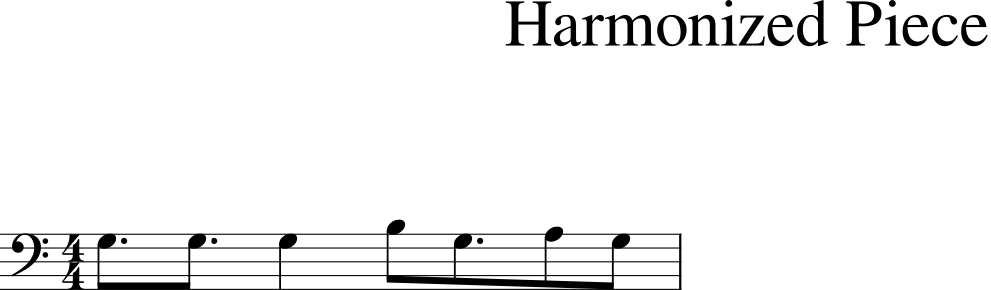

In [10]:
m.show()

In [11]:
notes = m.getElementsByClass('Note')

In [12]:
print(notes[0].offset)
print(notes[0].duration.quarterLength)

0.0
0.75


In [13]:
m = real_score.parts[0].getElementsByClass('Measure')[6]
for n in m.getElementsByClass('Note'):
    print(n.offset, ' - ', n.duration)

0.0  -  <music21.duration.Duration 0.75>
0.75  -  <music21.duration.Duration 0.75>
1.5  -  <music21.duration.Duration 1.0>
2.0  -  <music21.duration.Duration 0.5>
2.5  -  <music21.duration.Duration 0.75>
3.0  -  <music21.duration.Duration 0.5>
3.5  -  <music21.duration.Duration 0.5>
